# Max One Genetic Algorithm Solution
The objective in the Max One problem is to maximize the number of ones in a string of `k` binary digits. 

An individual is encoded as a string of `l` binary digits. 

For example, suppose `l=8`.
An individual in the population could be `10100111`
and the target would be `11111111`

## Genetic Algorithm Overview

Here is the pipeline for any Genetic Algorithm

```
Create population of m individuals

for i = 1...budget
    Compute Fitness
    Parent Selection
    Reproduction
        Crossover 
        Mutation
    Survival Selection
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define Constants

In [2]:
budget = 1000
n_individuals = 10

## Define Objective Fitness
We are trying to minimize the Hamming distance between some binary string `x` and an all-ones binary string `y`. This is equivalent to maximizing the number of `1`s in `x`.

In [3]:
def hamming_dist(x, y):
    ''' Computes the Hamming distance
    '''
    
    n_unequal = sum(x - y == 0)
    n_tot = len(x)
    
    return n_unequal / n_tot

def fitness(x):
    ''' The fitness objective
    '''
    
    target = np.ones(x.shape)
    
    return hamming_dist(x, target)

## Initialization

In [4]:
def create_population(size, genotype_size=8):
    '''Randomly initializes population
    
    genotype_size: number of bits
    '''
    
    return np.random.randint(2, size=(size, genotype_size), dtype=np.uint8)

Here's an example population

In [5]:
create_population(n_individuals, genotype_size=8)

array([[0, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 0],
       [1, 1, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 1],
       [1, 1, 0, 1, 1, 0, 1, 1]], dtype=uint8)

## Parent Selection

In [6]:
def select_parents(population, fitnesses, n_parents):
    '''Fitness-Proportionate Selection
    '''
    
    probabilities = fitnesses / np.sum(fitnesses)
    parent_idxs = np.random.choice(population.shape[0], size=n_parents, replace=True, p=probabilities)
    parents = population[parent_idxs]
    
    return parents

## Variation: Crossover & Mutation

In [7]:
def vary(parents, n_offspring):
    ''' Perform both crossover and mutation
    '''
    
    offspring = crossover(parents, n_offspring)
    offpring = mutation(offspring)
    
    return offspring


#############################
######### Crossover #########
def crossover(parents, n_offspring, cprob=1.):
    '''One-point crossover applied to all parents
    
    cprob: probability of crossover
    '''

    offspring = parents[:n_offspring].copy()

    for i in range(1, n_offspring, 2):
        if np.random.rand() < cprob:
            child_1, child_2 = reproduce(parents[i - 1], parents[i])
            offspring[i - 1] = child_1
            offspring[i] = child_2
        
    return offspring


def reproduce(parent_1, parent_2):
    '''One-point crossover
    '''
    
    gene_size = parent_1.shape[0]
    crossover_point = np.random.randint(0, gene_size)
    child_1 = np.hstack((parent_1[:crossover_point], parent_2[crossover_point:]))
    child_2 = np.hstack((parent_1[crossover_point:], parent_2[:crossover_point]))

    return child_1, child_2
    
#############################
######### Mutation ##########
def mutation(offspring, mprob=1.):
    '''Bit-flip mutation applied to all offspring
    
    mprob: probability of mutation
    '''
    
    offspring_mut = offspring.copy()
    for child in offspring_mut:
        if np.random.rand() < mprob:
            child = mutate(child)
        
    return offspring_mut


def mutate(individual):
    '''Bit-flip mutation
    '''
    
    indiv_mut = individual.copy()
    random_gene = np.random.randint(individual.shape[0])
    indiv_mut[random_gene] = 0 if indiv_mut[random_gene] is 1 else 0
    
    return indiv_mut

## Survival Selection

In [8]:
def select_survivors(offspring, fitnesses, k):
    '''Truncation selection 
    
    Select k best offspring according to fitnesses.
    
    k: number of survivors
    '''
    
    top_k_idxs = np.argpartition(fitnesses, -k)[-k:]
    survivors = offspring[top_k_idxs]
    
    return survivors

## Run Genetic Algorithm

In [9]:
population = create_population(n_individuals, genotype_size=64)

# store an extra value because we want to store the max before and after running the GA
best_so_far = np.zeros(budget + 1)

for i in range(budget):
    fitnesses = [fitness(parent) for parent in population]
    # save the maximum fitness for each generation
    best_so_far[i] = max(fitnesses)
    
    parents = select_parents(population, fitnesses, n_parents=n_individuals)
    
    offspring = vary(parents, n_offspring=10)
    
    population = select_survivors(offspring, fitnesses, k=10)

# recompute fitnesses for the last generation
fitnesses = [fitness(parent) for parent in population]
best_so_far[-1] = max(fitnesses)

## View Results
Let's view the maximum fitness value at each generation

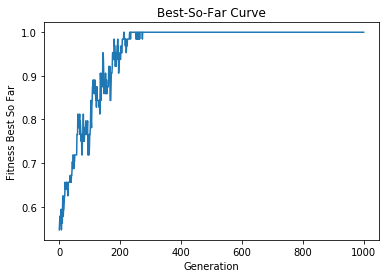

In [10]:
plt.title('Best-So-Far Curve')
plt.plot(best_so_far)
plt.xlabel('Generation')
plt.ylabel('Fitness Best So Far')
plt.show()